### Importing libraries 

In [2]:
import tensorflow as tf
import numpy as np

### The seed method in numpy can be implemented in tensorflow as .set_random_seed 

In [3]:
np.random.seed(110)
tf.set_random_seed(101)

In [5]:
rand_a = np.random.uniform(0, 100, (5, 5))
rand_a

array([[ 2.50444406,  8.95233719, 85.40843557, 49.11112285, 24.96044874],
       [76.12729278, 54.02329787, 38.56154219, 64.40740886, 17.16688141],
       [70.91856385,  4.0216143 , 59.99252553, 20.33461853, 24.89397676],
       [39.91088697, 71.38603362, 79.2442088 , 89.48716504, 22.05495529],
       [ 1.29733695, 76.08208305, 18.26621612, 79.35547715, 95.07525328]])

In [9]:
rand_b = np.random.uniform(0, 100, (5, 1))
rand_b

array([[ 6.66790291],
       [63.43868617],
       [16.99324953],
       [87.9556106 ],
       [22.73058148]])

### Creating two placeholders with datatype of float32 

In [11]:
a = tf.placeholder(dtype = tf.float32)

In [12]:
b = tf.placeholder(dtype = tf.float32)

### Doing the operations or in other words designing a graph 

In [14]:
add_op = a + b

# or

add_op = tf.add(a, b)

In [17]:
mul_op = a * b

# or 

mul_op = tf.multiply(a, b)

### Feeding the data to the placeholders while running the operation in a session using ' feed_dict ' as a argument to run method  

In [24]:
with tf.Session() as sess:
    
    add_result = sess.run(add_op, feed_dict = {a: 10, b: 20})
    
    print (add_result)
    
    print('\n')
    
    mul_result = sess.run(mul_op, feed_dict = {a: 10, b: 20})
    
    print (mul_result)
    
    print('\n')
    
    add_result = sess.run(add_op, feed_dict = {a: rand_a, b: rand_b})
    
    print (add_result)
    
    print('\n')
    
    mul_result = sess.run(mul_op, feed_dict = {a: rand_a, b: rand_b})
    
    print (mul_result)
    
    print('\n')

30.0


200.0


[[  9.172347  15.62024   92.07633   55.779026  31.628353]
 [139.56598  117.46198  102.00023  127.8461    80.60557 ]
 [ 87.91181   21.014864  76.98578   37.327866  41.887226]
 [127.8665   159.34164  167.19983  177.44278  110.01057 ]
 [ 24.027918  98.81267   40.996796 102.08606  117.80584 ]]


[[  16.69939    59.693317  569.4951    327.4682    166.43385 ]
 [4829.4155   3427.167    2446.2937   4085.9214   1089.0444  ]
 [1205.1368     68.340294 1019.468     345.55124   423.02957 ]
 [3510.3867   6278.8022   6969.973    7870.8984   1939.857   ]
 [  29.489223 1729.39      415.20172  1803.7961   2161.1157  ]]




### Example NN 

In [25]:
n_features = 10
n_dense_neurons = 3

In [27]:
x = tf.placeholder(tf.float32, (None, n_features))

##### Explanation

~   Initializing the weight using random values of shape of no. of features by no. of neurons in a layer.

i.e., If the no of features is 10 and no of neurons in a layer is 3, then our weights will be in (10 x 3) shape.

~   Initializing the biases as ones in the shape 1 row having no of neurons in a layer.

i.e., In our case, the biases will be the values of ones in (1 x 3) shape.

In [28]:
w = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

In [30]:
b = tf.Variable(tf.ones([n_dense_neurons]))

##### z = wx + b

In [31]:
xw = tf.matmul(x, w)

In [32]:
z = tf.add(xw, b)

##### Activation function 

In [34]:
a = tf.sigmoid(z)

##### Running the tensor model 

In [50]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    layer_out = sess.run(a, feed_dict = {x: np.random.random([1, n_features])})
    
    print (layer_out)

[[0.69039905 0.01755372 0.97496706]]


# Simple Regression Example 

## Importing Matplotlib to make a plot 

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [84]:
x_data

array([-0.68224023,  2.12968246,  1.68129903,  4.09040257,  3.19076133,
        5.4516979 ,  5.82386393,  7.17405194,  8.82984383, 11.0516605 ])

In [87]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [88]:
y_label

array([0.70421012, 0.72560073, 2.36159442, 2.60813307, 4.66495531,
       6.75238681, 6.40992979, 6.35166196, 7.44591115, 8.81859252])

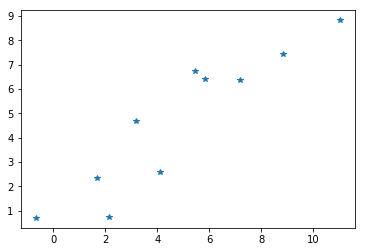

In [93]:
plt.plot(x_data, y_label, "*")

y = mx + b

In [94]:
np.random.rand(2)

array([0.54737218, 0.96390796])

In [96]:
m = tf.Variable(0.54)
b = tf.Variable(0.96)

In [123]:
error = 0

for x, y in zip(x_data, y_label):
    
    y_hat = tf.add(tf.multiply(m, x), b)
    
    error += (y - y_hat)**2


In [124]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

train = optimizer.minimize(error)

In [125]:
init = tf.global_variables_initializer()

In [127]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope , final_intercept = sess.run([m, b])
    
    print (final_slope)
    print (final_intercept)

0.7579409
0.99017537


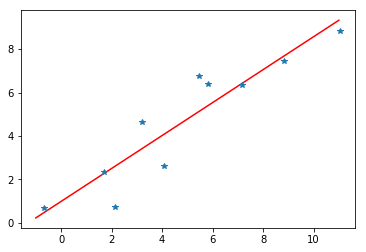

In [132]:
x_test = np.linspace(-1, 11, 10)

y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test, y_pred_plot, "r")
plt.plot(x_data, y_label, "*")